# import libraries

In [4]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import glob
import matplotlib.gridspec
import scipy.ndimage

import wrf
import netCDF4
import cmocean

import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy
import cartopy.io.shapereader

import glob

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [5]:
run_info = 'FMAASO'
skip_time=0

# opening mean fields

## control data

YSU, ACM2, MYJ, and UW

ysu

In [6]:
ysu_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/001'
ysu_file_list = sorted(glob.glob(ysu_root_dir+'/'+'wrfout*'))
ysu_ds_list = [netCDF4.Dataset(file) for file in ysu_file_list]

# ysu_ptot_400 = numpy.load('DATA_ptot_400_sensitivity.npy')
# ysu_geopot_400 = numpy.load('DATA_geopot_400_sensitivity.npy')
# ysu_tk_400 = numpy.load('DATA_tk_400_sensitivity.npy')

ysu_cont_mfds = xarray.open_mfdataset(ysu_root_dir + '/' + 'wrfout*')

ysu_time = ysu_cont_mfds['Times'].values
ysu_xlat = ysu_cont_mfds['XLAT'].values[0,:,:]
ysu_xlong = ysu_cont_mfds['XLONG'].values[0,:,:]
ysu_landmask = ysu_cont_mfds['LANDMASK'].values[0,:,:]

# ysu_qvapor_400 = ysu_cont_mfds['QVAPOR'].values
# ysu_t_400 = ysu_cont_mfds['T'].values
# ysu_pblh_400 = ysu_cont_mfds['PBLH'].values

In [7]:
ysu_rainc_400 = ysu_cont_mfds['RAINC'].values
ysu_rainnc_400 = ysu_cont_mfds['RAINNC'].values

acm2

In [8]:
acm2_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_ACM2_scheme_10days'
acm2_file_list = sorted(glob.glob(acm2_root_dir+'/'+'wrfout*'))
acm2_ds_list = [netCDF4.Dataset(file) for file in acm2_file_list]

In [9]:
acm2_cont_mfds = xarray.open_mfdataset(acm2_root_dir + '/' + 'wrfout*')

In [10]:
acm2_rainc_400 = acm2_cont_mfds['RAINC'].values
acm2_rainnc_400 = acm2_cont_mfds['RAINNC'].values

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


myj

In [11]:
myj_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_MYJ_scheme_10days'
myj_file_list = sorted(glob.glob(myj_root_dir+'/'+'wrfout*'))
myj_ds_list = [netCDF4.Dataset(file) for file in myj_file_list]

In [12]:
myj_cont_mfds = xarray.open_mfdataset(myj_root_dir + '/' + 'wrfout*')

In [13]:
myj_rainc_400 = myj_cont_mfds['RAINC'].values
myj_rainnc_400 = myj_cont_mfds['RAINNC'].values

uw

In [14]:
uw_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_UW_scheme_10days'
uw_file_list = sorted(glob.glob(uw_root_dir+'/'+'wrfout*'))
uw_ds_list = [netCDF4.Dataset(file) for file in uw_file_list]

In [15]:
uw_cont_mfds = xarray.open_mfdataset(uw_root_dir + '/' + 'wrfout*')

In [16]:
uw_rainc_400 = uw_cont_mfds['RAINC'].values
uw_rainnc_400 = uw_cont_mfds['RAINNC'].values

mynn30

In [17]:
mynn30_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_MYNN30_scheme_10days'
mynn30_file_list = sorted(glob.glob(mynn30_root_dir+'/'+'wrfout*'))
mynn30_ds_list = [netCDF4.Dataset(file) for file in mynn30_file_list]

In [18]:
mynn30_cont_mfds = xarray.open_mfdataset(mynn30_root_dir + '/' + 'wrfout*')

In [19]:
mynn30_rainc_400 = mynn30_cont_mfds['RAINC'].values
mynn30_rainnc_400 = mynn30_cont_mfds['RAINNC'].values

temf

In [20]:
temf_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_TEMF_scheme_10days'
temf_file_list = sorted(glob.glob(temf_root_dir+'/'+'wrfout*'))
temf_ds_list = [netCDF4.Dataset(file) for file in temf_file_list]

In [21]:
temf_cont_mfds = xarray.open_mfdataset(temf_root_dir + '/' + 'wrfout*')

In [22]:
temf_rainc_400 = temf_cont_mfds['RAINC'].values
temf_rainnc_400 = temf_cont_mfds['RAINNC'].values

## phys data

ysu

In [23]:
ysu_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/001/'
ysu_file_list = sorted(glob.glob(ysu_root_dir+'/'+'wrfout*'))
ysu_ds_list = [netCDF4.Dataset(file) for file in ysu_file_list]
ysu_phys_mfds = xarray.open_mfdataset(ysu_root_dir + '/' + 'wrfout*')

In [24]:
ysu_rainc_1000 = ysu_phys_mfds['RAINC'].values
ysu_rainnc_1000 = ysu_phys_mfds['RAINNC'].values

acm2

In [25]:
acm2_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_ACM2_scheme_10days'
acm2_file_list = sorted(glob.glob(acm2_root_dir+'/'+'wrfout*'))
acm2_ds_list = [netCDF4.Dataset(file) for file in acm2_file_list]

In [26]:
acm2_phys_mfds = xarray.open_mfdataset(acm2_root_dir + '/' + 'wrfout*')

In [27]:
acm2_rainc_1000 = acm2_phys_mfds['RAINC'].values
acm2_rainnc_1000 = acm2_phys_mfds['RAINNC'].values

myj

In [28]:
myj_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_MYJ_scheme_10days'
myj_file_list = sorted(glob.glob(myj_root_dir+'/'+'wrfout*'))
myj_ds_list = [netCDF4.Dataset(file) for file in myj_file_list]

In [29]:
myj_phys_mfds = xarray.open_mfdataset(myj_root_dir + '/' + 'wrfout*')

In [30]:
myj_rainc_1000 = myj_phys_mfds['RAINC'].values
myj_rainnc_1000 = myj_phys_mfds['RAINNC'].values

uw

In [31]:
uw_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_UW_scheme_10days'
uw_file_list = sorted(glob.glob(uw_root_dir+'/'+'wrfout*'))
uw_ds_list = [netCDF4.Dataset(file) for file in uw_file_list]

In [32]:
uw_phys_mfds = xarray.open_mfdataset(uw_root_dir + '/' + 'wrfout*')

In [33]:
uw_rainc_1000 = uw_phys_mfds['RAINC'].values
uw_rainnc_1000 = uw_phys_mfds['RAINNC'].values

mynn30

In [34]:
mynn30_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_MYNN30_scheme_10days'
mynn30_file_list = sorted(glob.glob(mynn30_root_dir+'/'+'wrfout*'))
mynn30_ds_list = [netCDF4.Dataset(file) for file in mynn30_file_list]

In [35]:
mynn30_phys_mfds = xarray.open_mfdataset(mynn30_root_dir + '/' + 'wrfout*')

In [36]:
mynn30_rainc_1000 = mynn30_phys_mfds['RAINC'].values
mynn30_rainnc_1000 = mynn30_phys_mfds['RAINNC'].values

temf

In [37]:
temf_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_TEMF_scheme_10days'
temf_file_list = sorted(glob.glob(temf_root_dir+'/'+'wrfout*'))
temf_ds_list = [netCDF4.Dataset(file) for file in temf_file_list]

In [38]:
temf_phys_mfds = xarray.open_mfdataset(temf_root_dir + '/' + 'wrfout*')

In [39]:
temf_rainc_1000 = temf_phys_mfds['RAINC'].values
temf_rainnc_1000 = temf_phys_mfds['RAINNC'].values

## define dx, dy

In [40]:
dx = 50000. # 50,000 m or 50 km
dy = 50000.

# constants

In [41]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

get lat and lon info

In [42]:
xlong = ysu_cont_mfds['XLONG'].values[0,:,:]
xlat = ysu_cont_mfds['XLAT'].values[0,:,:]

calculate precip diffs

In [43]:
acm2_400_raintot = acm2_rainc_400+acm2_rainnc_400
temf_400_raintot = temf_rainc_400+temf_rainnc_400
myj_400_raintot = myj_rainc_400+myj_rainnc_400
uw_400_raintot = uw_rainc_400+uw_rainnc_400
mynn30_400_raintot = mynn30_rainc_400+mynn30_rainnc_400
ysu_400_raintot = ysu_rainc_400+ysu_rainnc_400

In [44]:
acm2_1000_raintot = acm2_rainc_1000+acm2_rainnc_1000
temf_1000_raintot = temf_rainc_1000+temf_rainnc_1000
myj_1000_raintot = myj_rainc_1000+myj_rainnc_1000
uw_1000_raintot = uw_rainc_1000+uw_rainnc_1000
mynn30_1000_raintot = mynn30_rainc_1000+mynn30_rainnc_1000
ysu_1000_raintot = ysu_rainc_1000+ysu_rainnc_1000

In [45]:
ysu_rain_diffs = ysu_1000_raintot-ysu_400_raintot
ysu_rain_diffs_hourly = numpy.diff(ysu_rain_diffs, axis=0)

acm2_rain_diffs = acm2_1000_raintot-acm2_400_raintot
acm2_rain_diffs_hourly = numpy.diff(acm2_rain_diffs, axis=0)

uw_rain_diffs = uw_1000_raintot-uw_400_raintot
uw_rain_diffs_hourly = numpy.diff(uw_rain_diffs, axis=0)

temf_rain_diffs = temf_1000_raintot-temf_400_raintot
temf_rain_diffs_hourly = numpy.diff(temf_rain_diffs, axis=0)

mynn30_rain_diffs = mynn30_1000_raintot-mynn30_400_raintot
mynn30_rain_diffs_hourly = numpy.diff(mynn30_rain_diffs, axis=0)

myj_rain_diffs = myj_1000_raintot-myj_400_raintot
myj_rain_diffs_hourly = numpy.diff(myj_rain_diffs, axis=0)

## get landmask

In [46]:
landmask = ysu_cont_mfds['LANDMASK'].sel(Time=0).values

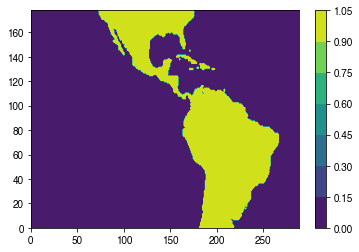

In [47]:
mp.contourf(landmask);mp.colorbar()

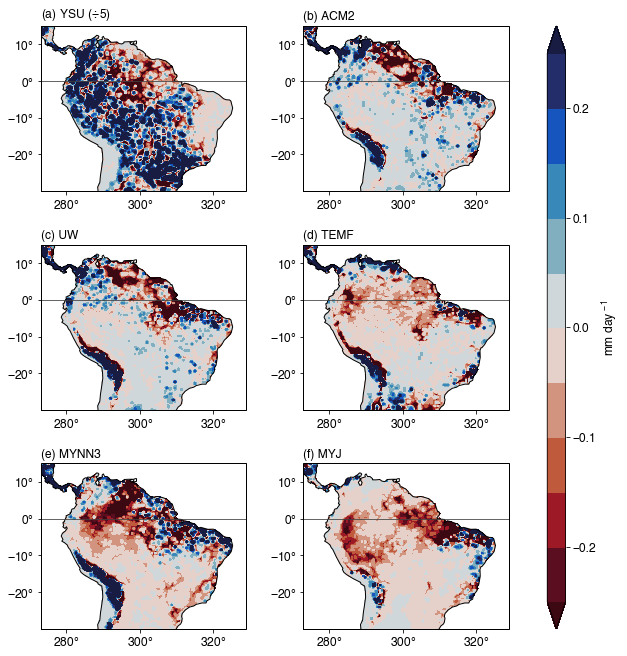

In [49]:
fontsize = 12

fig = mp.figure(figsize=(8.5,9))
lon_offset=25.

field_list = [ysu_rain_diffs_hourly,\
              acm2_rain_diffs_hourly,\
              uw_rain_diffs_hourly,\
              temf_rain_diffs_hourly,\
              mynn30_rain_diffs_hourly,\
              myj_rain_diffs_hourly]

levels = numpy.arange(-0.25,0.251,0.05)

PBL_names = ['(a) YSU ($\div\,5$)','(b) ACM2','(c) UW','(d) TEMF','(e) MYNN3','(f) MYJ']
ax_list = []

for i in range(6):
    
    ax = fig.add_subplot(3,2,i+1, projection=cartopy.crs.PlateCarree())
    
    ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    
    field = field_list[i]
    field_mean = numpy.nanmean(field[24:,:,:], axis=0)*24.
    if i==0:
        field_mean = field_mean/5.
    field_mean[landmask==0]=numpy.nan
    
    ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong, xlat, field_mean, \
                               levels=levels, \
                               cmap=cmocean.cm.balance_r, extend='both', \
                               transform=cartopy.crs.PlateCarree())

    for c in contour_plot.collections:
        c.set_edgecolor('face')
        c.set_rasterized(True)
    
    ax.set_xticks([-360+280,-360+300,-360+320])
    ax.set_yticks([-20,-10,0,10])
    ax.tick_params(labelsize=fontsize)
    ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
    ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])
    
    ax.text(s=PBL_names[i], x=0, y=1.02, 
            ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
    ax_list.append(ax)

fig.tight_layout(h_pad=3, w_pad=-5)

axpos_top = ax_list[1].get_position()
axpos_bot = ax_list[-1].get_position()

cbar_ax = fig.add_axes([axpos_bot.x1-.025, axpos_bot.y0, 0.03, axpos_top.y1-axpos_bot.y0])
cbar = fig.colorbar(contour_plot, cbar_ax, orientation='vertical')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

for c in cbar_ax.collections:
    c.set_edgecolor('face')

fig.savefig('../figures/SI_fig10.pdf', dpi=200, bbox_inches='tight', transparent=True)